In [70]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
import scipy as sp 
import math 
import scipy.stats as stats

In [71]:


# Naloži podatke
df = pd.read_csv('Hobotnice.csv')

# Poimenujmo stolpec (če nima imena) – privzamemo prvi stolpec
stolpec = df.columns[0]

# Izračun povprečja in standardnega odklona
povprecje = df[stolpec].mean()
std_odklon = df[stolpec].std()  # privzeto ddof=1 = vzorčni odklon

# Izpis rezultatov
print(f"Povprečje: {povprecje:.4f}")
print(f"Standardni odklon: {std_odklon:.4f}")

Povprečje: 43.9677
Standardni odklon: 35.6045


Širine razredov $w$ določimo po modificiranem Freedman-Diaconisovim pravilu:

$$w \doteq \frac{2.6  \cdot \mathrm{IQR}}{\sqrt[3]{n}}$$


In [72]:
#Poračunamo IQR:

df = pd.read_csv('Hobotnice.csv')

# Izberi stolpec
stolpec = df.columns[0]

# Izračun IQR
q1 = df[stolpec].quantile(0.25)
q3 = df[stolpec].quantile(0.75)
iqr = q3 - q1

# Izpis
print(f"IQR: {iqr:.4f}")


IQR: 38.0000


In [73]:
#Približne širine razredov bodo torej:
n = 94
sirina = 2.6*iqr/np.cbrt(n)

print(sirina)

21.729396270660764


Širino, dobljeno po Freedman-Diaconisu zaokrožimo na 20 ("najbližji večkratnik števila 10") in to upoštevamo pri risanju histograma

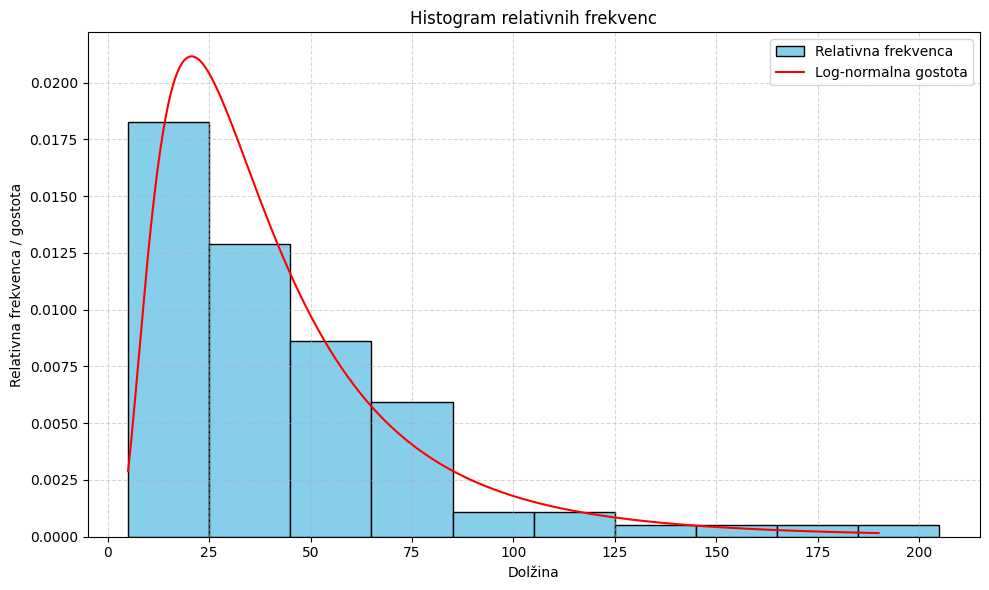

In [74]:
from scipy.stats import lognorm

df = pd.read_csv('Hobotnice.csv')

# Histogram - določimo širino stolpca
sirina = 20
min_vrednost = df[stolpec].min()
max_vrednost = df[stolpec].max()
meje = np.arange(min_vrednost, max_vrednost + sirina, sirina)

# Histogram relativnih frekvenc
plt.figure(figsize=(10, 6))
plt.hist(df[stolpec], bins=meje, color='skyblue', edgecolor='black', density=True, label='Relativna frekvenca')

# Log-normalna gostota
mean = 43.9677
std = 35.6045

# Pretvori v parametre log-normalne porazdelitve
# iz aritmetičnega povprečja in odklona
varianca = std**2
phi = np.sqrt(np.log(1 + varianca / mean**2))        # sigma (parametrizacija lognorm)
mu = np.log(mean) - 0.5 * phi**2                      # mu (log-mean)

# x-vrednosti za gostoto
x = np.linspace(min_vrednost, max_vrednost, 500)
pdf = lognorm.pdf(x, s=phi, scale=np.exp(mu))

# Nariši gostoto
plt.plot(x, pdf, 'r-', label='Log-normalna gostota')
plt.title('Histogram relativnih frekvenc')
plt.xlabel('Dolžina')
plt.ylabel('Relativna frekvenca / gostota')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
#Da določimo širine stolpcev, moramo poračunati še IQR logaritmov
stolpec = df.columns[0]

# Odstrani vrednosti ≤ 0 (log ni definiran)
podatki = df[df[stolpec] > 0][stolpec]

# Izračun logaritmov (naravni logaritem, baza e)
log_podatki = np.log(podatki)

# Izračun IQR logaritmov
q1 = np.percentile(log_podatki, 25)
q3 = np.percentile(log_podatki, 75)
iqr_log = q3 - q1

# Izpis rezultatov
print(f"Q1 (log): {q1:.4f}")
print(f"Q3 (log): {q3:.4f}")
print(f"IQR logaritmov: {iqr_log:.4f}")

Q1 (log): 2.9444
Q3 (log): 4.0431
IQR logaritmov: 1.0986


In [76]:
#Poračunamo širine razredov po modificiranem Freedman-Diaconisovim pravilu:



0.6304589548425512


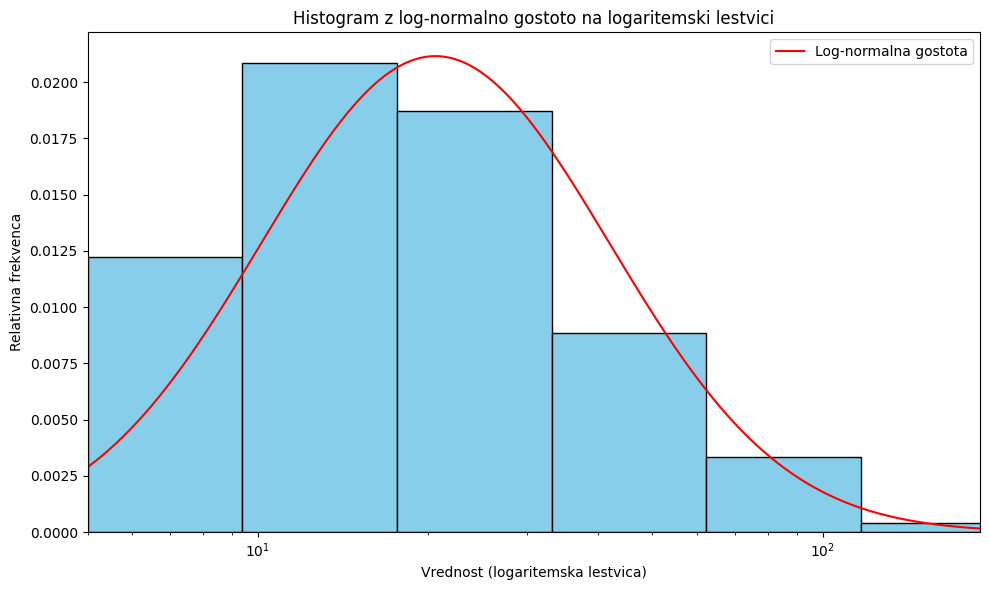

In [77]:
stolpec = df.columns[0]

# Uporabi samo pozitivne vrednosti (logaritemska skala zahteva >0)
podatki = df[df[stolpec] > 0][stolpec]

# Izračun logaritmov podatkov (za log-skalo)
log_podatki = np.log(podatki)

# Izračun IQR logaritmov
q1 = np.percentile(log_podatki, 25)
q3 = np.percentile(log_podatki, 75)
iqr_log = q3 - q1

# Število podatkov
n = len(log_podatki)

# Širina razreda po Freedman-Diaconisu na log-skali
sirina_log = 2.6 * iqr_log / np.cbrt(n)
print(sirina_log)

# Določimo robove binov na log-skali
min_log = log_podatki.min()
max_log = log_podatki.max()
meje_log = np.arange(min_log, max_log + sirina_log, sirina_log)
bins = np.exp(meje_log)  # pretvori nazaj v originalno skalo

# Parametri log-normalne porazdelitve
mean = 43.9677
std = 35.6045
varianca = std**2
phi = np.sqrt(np.log(1 + varianca / mean**2))  # sigma (parametrizacija lognorm)
mu = np.log(mean) - 0.5 * phi**2  # mu (log-mean)

# Histogram in gostota
plt.figure(figsize=(10, 6))
plt.hist(podatki, bins=bins, color='skyblue', edgecolor='black', density=True)

# Log-normalna gostota
x = np.logspace(np.log10(podatki.min()), np.log10(podatki.max()), 500)
pdf = lognorm.pdf(x, s=phi, scale=np.exp(mu))
plt.plot(x, pdf, 'r-', label='Log-normalna gostota')

plt.xscale('log')
plt.xlim(podatki.min(), podatki.max())
plt.xlabel('Vrednost (logaritemska lestvica)')
plt.ylabel('Relativna frekvenca')
plt.title('Histogram z log-normalno gostoto na logaritemski lestvici')
plt.legend()
plt.tight_layout()
plt.show()

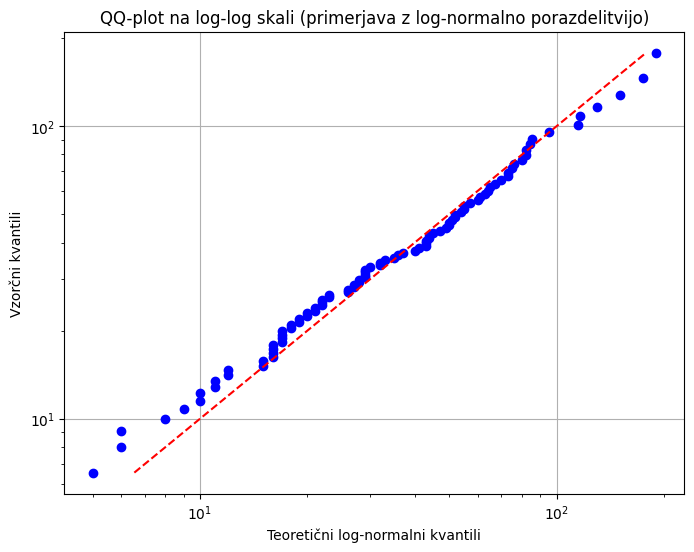

In [69]:
podatki = pd.read_csv('Hobotnice.csv')  

# Pretvorimo v 1D array (94 vrednosti)
vzorec = podatki.values.ravel()  
# Prilagodimo log-normalno porazdelitev
parametri = stats.lognorm.fit(vzorec, floc=0)  # Prilagoditev (oblika, loc=0, scale)

# Log-normalna gostota
mean = 43.9677
std = 35.6045

# Pretvori v parametre log-normalne porazdelitve
# iz aritmetičnega povprečja in odklona
variance = std**2
phi = np.sqrt(np.log(1 + variance / mean**2))        # sigma (parametrizacija lognorm)
mu = np.log(mean) - 0.5 * phi**2    

# Generirajmo teoretične kvantile
teoreticni_kvantili = stats.lognorm.ppf(
    np.linspace(0.01, 0.99, len(vzorec)), s=phi, scale=np.exp(mu))

# Narišemo na log-log skali
plt.figure(figsize=(8, 6))
plt.loglog(np.sort(vzorec), teoreticni_kvantili, 'bo')  # Log-log QQ-plot
plt.loglog(teoreticni_kvantili, teoreticni_kvantili, 'r--')  # Referenčna črta
plt.xlabel("Teoretični log-normalni kvantili")
plt.ylabel("Vzorčni kvantili")
plt.title("QQ-plot na log-log skali (primerjava z log-normalno porazdelitvijo)")
plt.grid(True)
plt.show()